In [1]:
NAME = "Michael Cornelisse"
STUDENT_NUMBER = "s1059020"
COLLABORATOR_NAME = "Nienke Helmers"
COLLABORATOR_STUDENT_NUMBER = "s1016904"

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source

from toolbox.pca_plot import get_variance_percentage, get_number_of_attributes, plot_pca_variance
from toolbox.data_processing import load_data, clean_data, sort_X_train_and_test_data, get_X_train_and_test_data, merge_train_and_test_data,get_y_train_and_test_data
from toolbox.k_fold_algorithm import k_fold, plot_classification_error
from toolbox.plot_results import get_tree_graph, plot_cm_and_rc
from toolbox.gradient_search import grid_search_classifier

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import plot_tree

In [3]:
X_train, X_test, y = load_data()

In [4]:
# Clean data
X_train, X_test, y = clean_data(X_train, X_test, y)

In [5]:
# Sort the indexes
X_train, X_test = sort_X_train_and_test_data(X_train, X_test)
y.index = pd.to_numeric(y.index)
y_train, y_test = get_y_train_and_test_data(y)

In [6]:
pca = PCA()
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

pca_complete = np.append(pca_train, pca_test, 0)
pca.n_components_

38

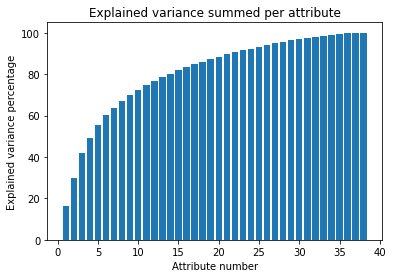

Figure: A plot of the explained variance. The variance is summed for all attributes up to and including
    the current attribute number,for examplethe tenth attribute shows the sum of attributes 1 to 10.
There are 21 attributes that together explain 90% of the variance.


In [7]:
pca_variance_percentage = get_variance_percentage(pca)
no_attributes = get_number_of_attributes(pca_variance_percentage)
plot_pca_variance(pca_variance_percentage, no_attributes)

In [8]:
#Crop pca_data
pca_data = np.delete(pca_complete, slice(no_attributes, len(pca_complete)) , 1)

#Split data back to original train and test split
pca_train = pca_data[:38]
pca_test = pca_data[38:]

In [9]:
parameters_tree = {
    'max_depth' : [2, 4, 6, 10, 'None'],
    'min_samples_leaf' : [2, 4, 6],
    'criterion' : ['gini', 'entropy'],
    'random_state' : ['None', 10, 42]
}

predictions_tree, dtc = grid_search_classifier('tree', parameters_tree, pca_train, pca_test, y_train, y_test, False)

The best parameters for this model are: 
DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=10)
This gives an accuracy of 0.7941176470588235 and an error of 0.20588235294117652
